## Object Detection
This is the 2nd file of myproject Person detection. Please see my 1st file which is "project 2 - EDA.ipynb". Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. The goal of my current project is to detect person from a collection of images and videos and then create a bounding box to state where the object is located. I am using Yolov8 as model architecture with ultralytics library. Dataset obtained from 'Coco2017' and collected using fiftyone library. Please see my 1st file to collect dataset and EDA.

### 1. Install and import ultralytics library first

In [ ]:
!pip install ultralytics

In [1]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Setup complete ✅ (16 CPUs, 7.6 GB RAM, 100.4/1006.9 GB disk)

OS                  Linux-5.15.146.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
Environment         Linux
Python              3.11.7
Install             pip
RAM                 7.62 GB
CPU                 11th Gen Intel Core(TM) i7-11800H 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.2.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.65.0>=4.64.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0


### 2. Get the pre-trained Yolov8
URL : https://docs.ultralytics.com/tasks/detect/ <br>
There are several pretrained files for detection. First row is the fastest but the result is not to good. I'm using "yolov8m.pt"<img src="yolo pretrained.png">

In [2]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt

In [2]:
model = YOLO("yolov8m.pt")

In [6]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /home/kusumapur/anaconda3/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: ultralytics


In [7]:
!pip install -U seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
!yolo checks

Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Setup complete ✅ (16 CPUs, 7.6 GB RAM, 98.4/1006.9 GB disk)

OS                  Linux-5.15.146.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
Environment         Linux
Python              3.11.7
Install             pip
RAM                 7.62 GB
CPU                 11th Gen Intel Core(TM) i7-11800H 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.2.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.65.0>=4.64.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0


### 3. Use yolov8m as pre-trained model

In [3]:
model = YOLO("yolov8m.pt")

In [6]:
%cd MyProject/person_detection

/home/kusumapur/MyProject/person_detection


In [4]:
!pwd

/home/kusumapur/MyProject/person_detection


### 4. Train the dataset with 25 epoch and batch 8

In [5]:
model.train(data='data-yolo/dataset.yaml', epochs=25,imgsz=640, device=0, batch=8 )

Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data-yolo/dataset.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/train.cache... 6000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6000/6000 [00:00<?, ?it/s]
val: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/val.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.65G      1.363      1.387      1.418         98        640: 100%|██████████| 750/750 [02:43<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]


                   all        300       1248      0.494      0.386      0.391      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.83G      1.606      1.674      1.601         38        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.38it/s]

                   all        300       1248      0.577      0.454      0.485      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.84G      1.554       1.59       1.56         43        640: 100%|██████████| 750/750 [02:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.48it/s]

                   all        300       1248      0.562      0.454      0.485       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.84G      1.497       1.52      1.535         49        640: 100%|██████████| 750/750 [02:41<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.44it/s]

                   all        300       1248       0.68       0.47      0.547      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.83G      1.439      1.446      1.497         34        640: 100%|██████████| 750/750 [02:39<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]

                   all        300       1248      0.703      0.456      0.554      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.81G      1.402      1.382       1.46         41        640: 100%|██████████| 750/750 [02:36<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.89it/s]

                   all        300       1248      0.676      0.518      0.596      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       3.8G      1.348      1.326      1.438         35        640: 100%|██████████| 750/750 [02:36<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.64it/s]

                   all        300       1248       0.69      0.547      0.626      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.83G      1.334      1.282      1.415         76        640: 100%|██████████| 750/750 [02:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.88it/s]

                   all        300       1248        0.7      0.533      0.609      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.83G      1.279      1.218      1.383         28        640: 100%|██████████| 750/750 [02:37<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.56it/s]

                   all        300       1248       0.74       0.53      0.631      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.83G       1.26      1.183      1.373         65        640: 100%|██████████| 750/750 [02:39<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.52it/s]

                   all        300       1248      0.714      0.544      0.648      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.83G      1.244      1.163      1.365         79        640: 100%|██████████| 750/750 [02:38<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]

                   all        300       1248      0.702      0.593      0.661      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.84G      1.219      1.129      1.341         54        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.84it/s]

                   all        300       1248      0.702      0.587      0.671      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.83G      1.207      1.102      1.334         47        640: 100%|██████████| 750/750 [02:37<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.93it/s]

                   all        300       1248      0.752      0.574       0.68      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.81G      1.175      1.072      1.316         81        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.92it/s]

                   all        300       1248      0.723      0.589      0.683      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.82G      1.153       1.03      1.301         68        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.86it/s]

                   all        300       1248      0.771      0.584      0.693      0.448


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.83G      1.148     0.9936       1.29         13        640: 100%|██████████| 750/750 [02:36<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.82it/s]

                   all        300       1248      0.757      0.605      0.697      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.83G      1.131     0.9716      1.272         30        640: 100%|██████████| 750/750 [02:36<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.97it/s]

                   all        300       1248      0.751      0.588      0.699      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.82G       1.11     0.9347       1.26         26        640: 100%|██████████| 750/750 [02:34<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.96it/s]

                   all        300       1248      0.782      0.591      0.713      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.81G      1.085     0.9085      1.242         23        640: 100%|██████████| 750/750 [02:34<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.46it/s]

                   all        300       1248      0.752      0.604      0.704      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.83G      1.068     0.8843      1.231         27        640: 100%|██████████| 750/750 [02:34<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.06it/s]

                   all        300       1248      0.774      0.602      0.712      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.83G      1.046     0.8506      1.216         18        640: 100%|██████████| 750/750 [02:36<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.02it/s]

                   all        300       1248      0.765      0.619      0.719      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.83G      1.031      0.825      1.204         24        640: 100%|██████████| 750/750 [02:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.75it/s]

                   all        300       1248      0.753        0.6      0.716      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.81G      1.006     0.8039      1.193         34        640: 100%|██████████| 750/750 [02:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.05it/s]

                   all        300       1248      0.765       0.63      0.733      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.83G     0.9846     0.7664      1.176         21        640: 100%|██████████| 750/750 [02:35<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]

                   all        300       1248      0.765      0.627      0.736      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.83G     0.9627     0.7463      1.157         38        640: 100%|██████████| 750/750 [02:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.82it/s]

                   all        300       1248      0.756      0.633      0.732      0.488



25 epochs completed in 1.126 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 52.0MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.82it/s]


                   all        300       1248      0.755      0.632      0.732      0.488
Speed: 0.2ms preprocess, 6.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4399046b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

#### 4.1 Confusion Matrix

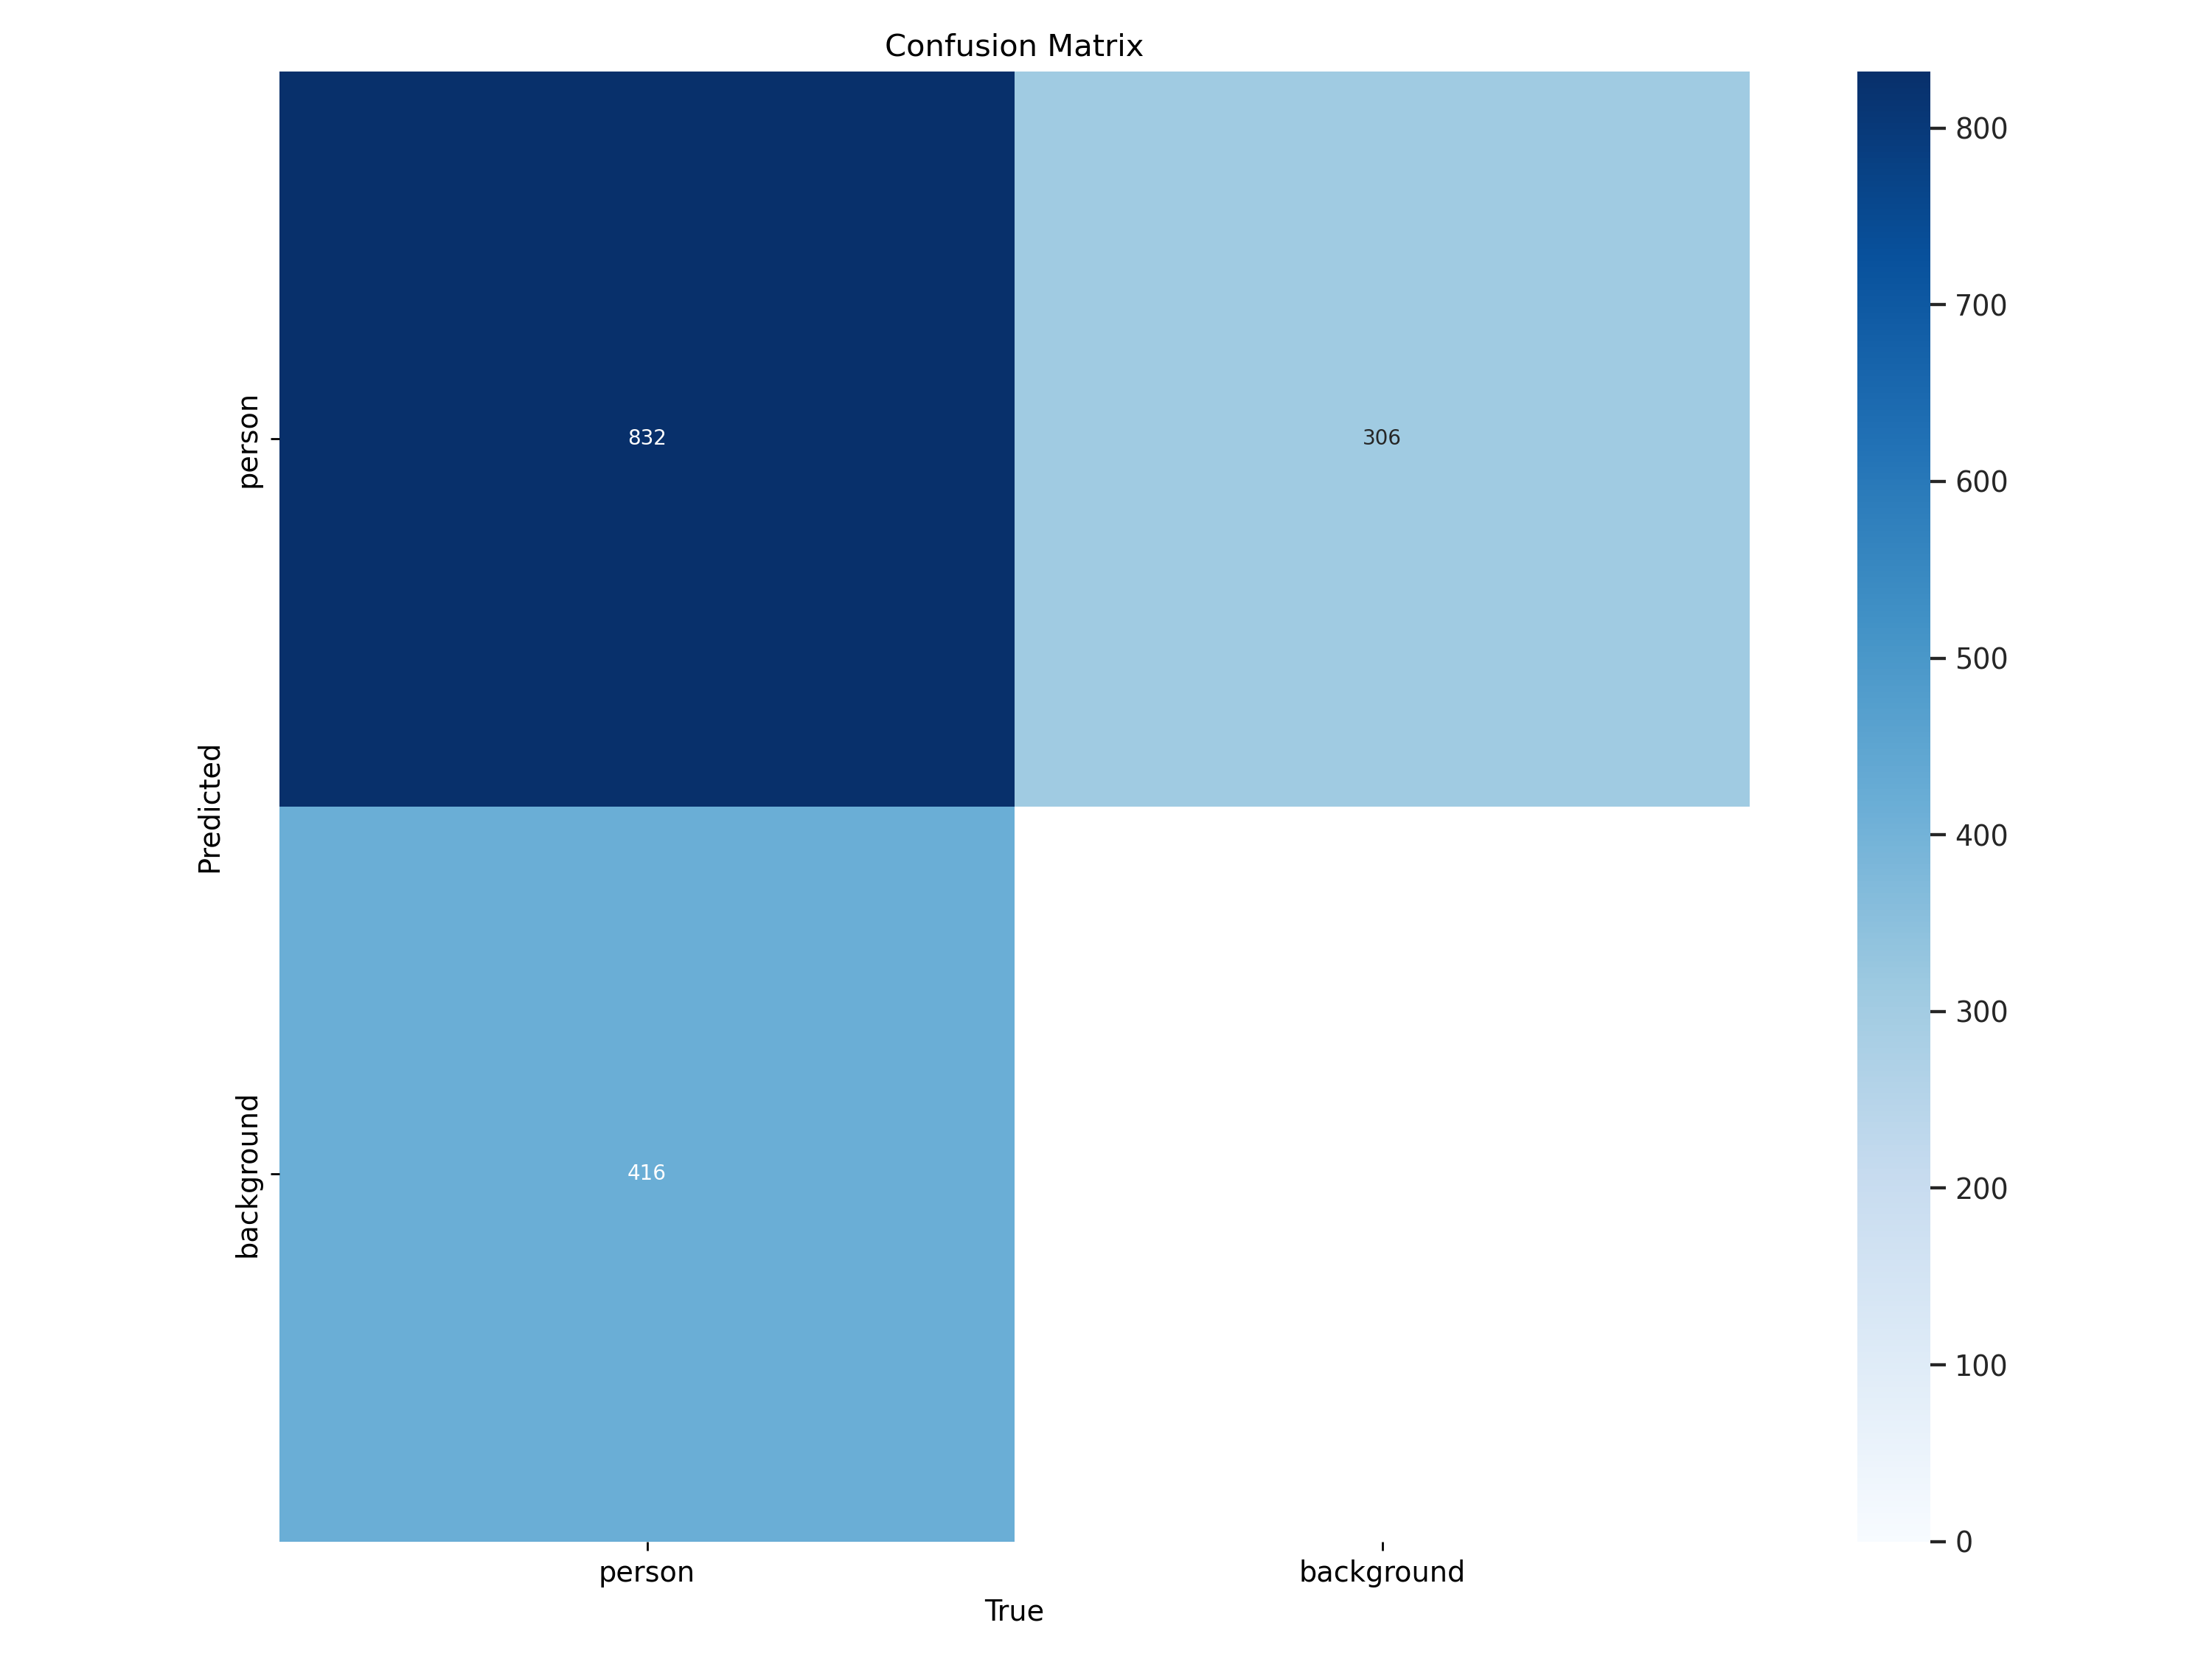

In [6]:
Image(filename='runs/detect/train6/confusion_matrix.png', width=600)

#### 4.2 Loss, precission, recall, and mAP
We get best mAP50 is 0.732 and mAP50-95 0.488

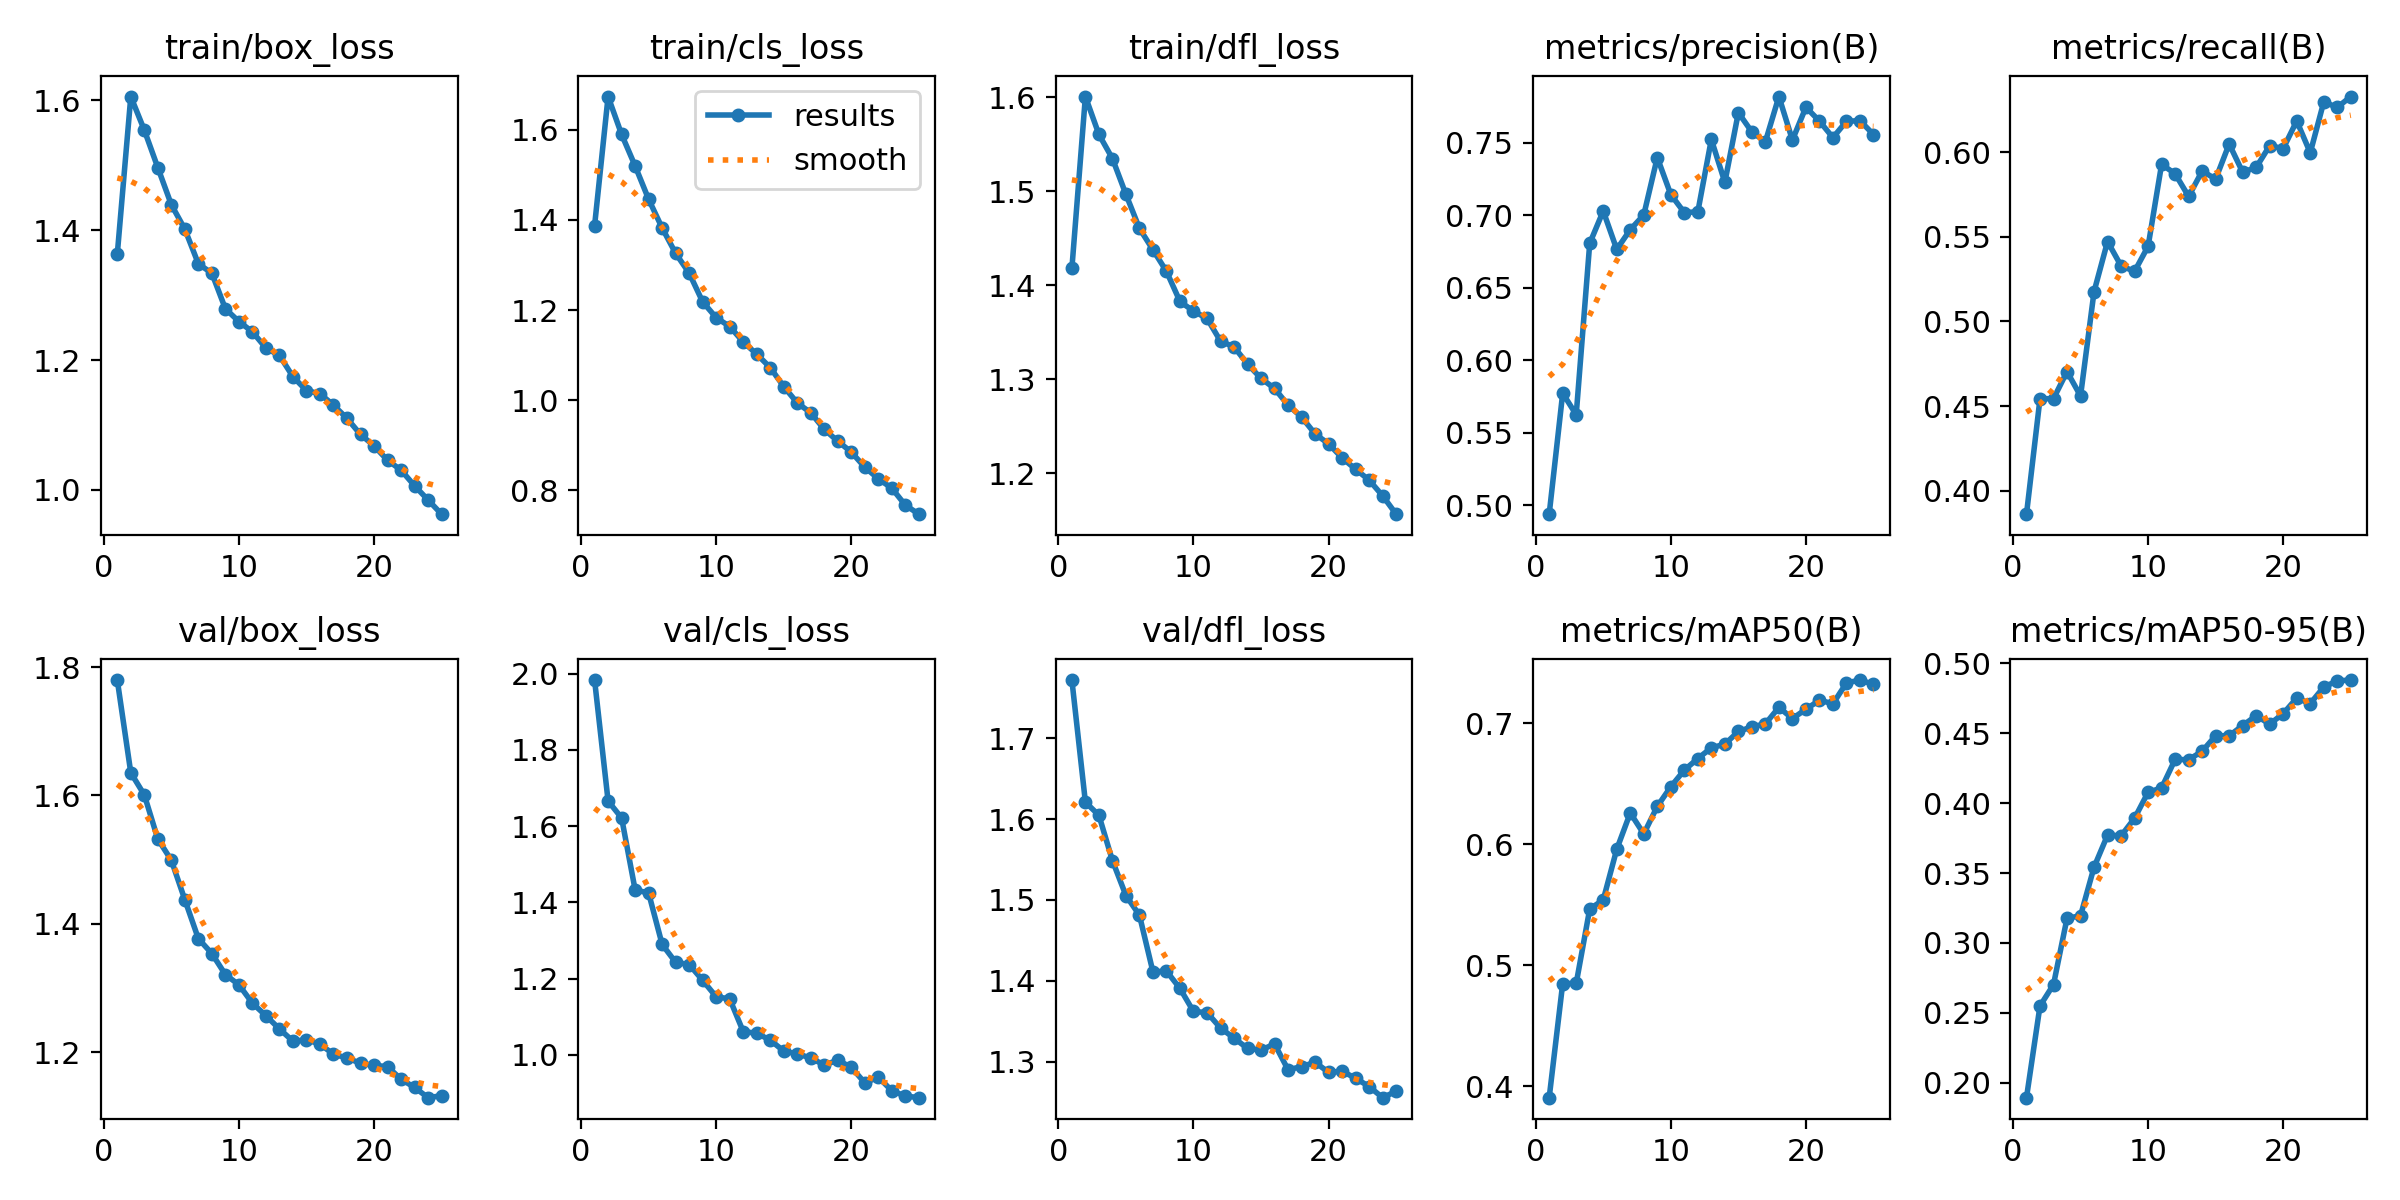

In [7]:
Image(filename='runs/detect/train6/results.png')

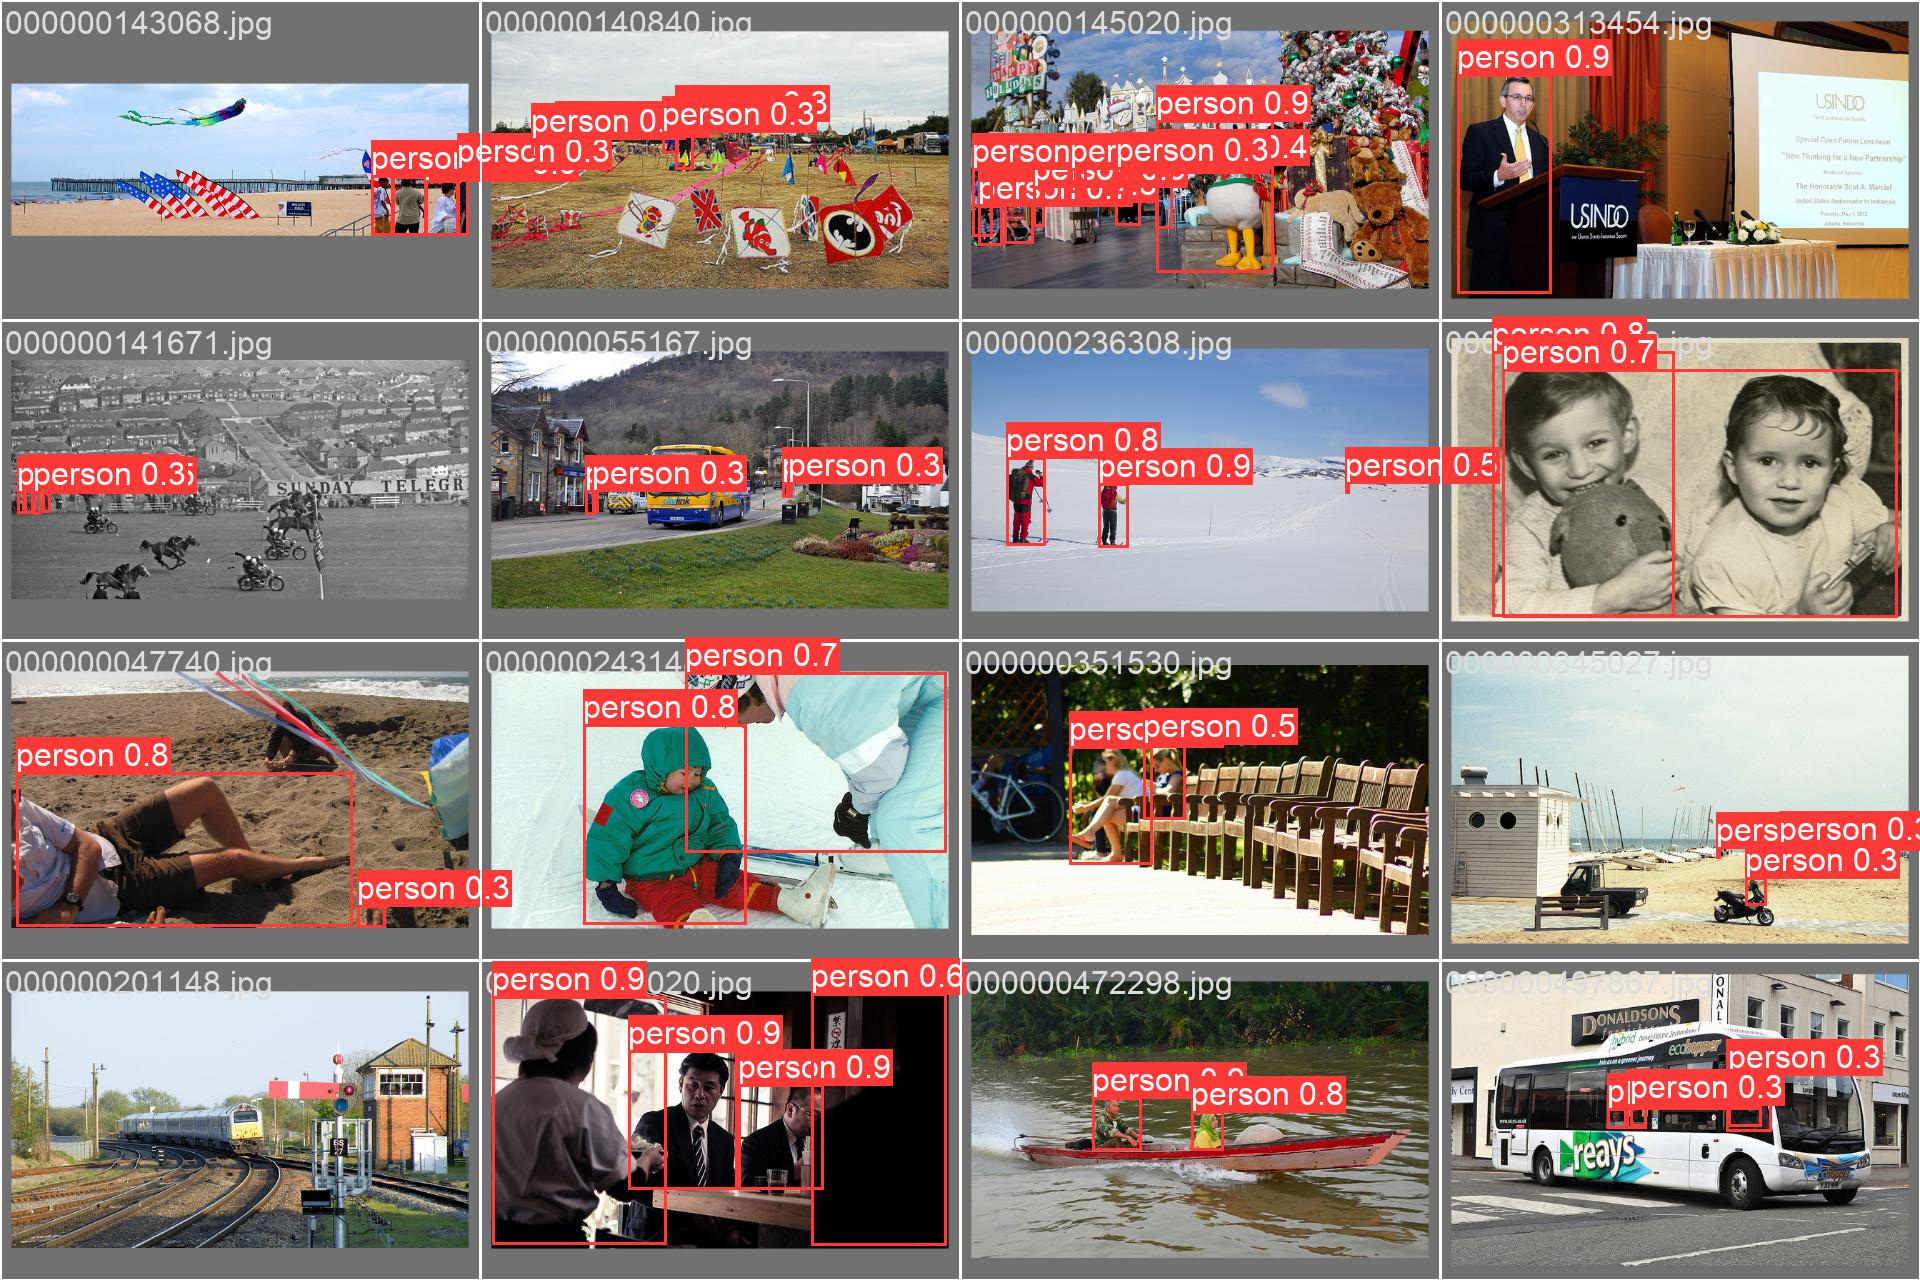

In [8]:
Image(filename=f'runs/detect/train6/val_batch0_pred.jpg', width=600)

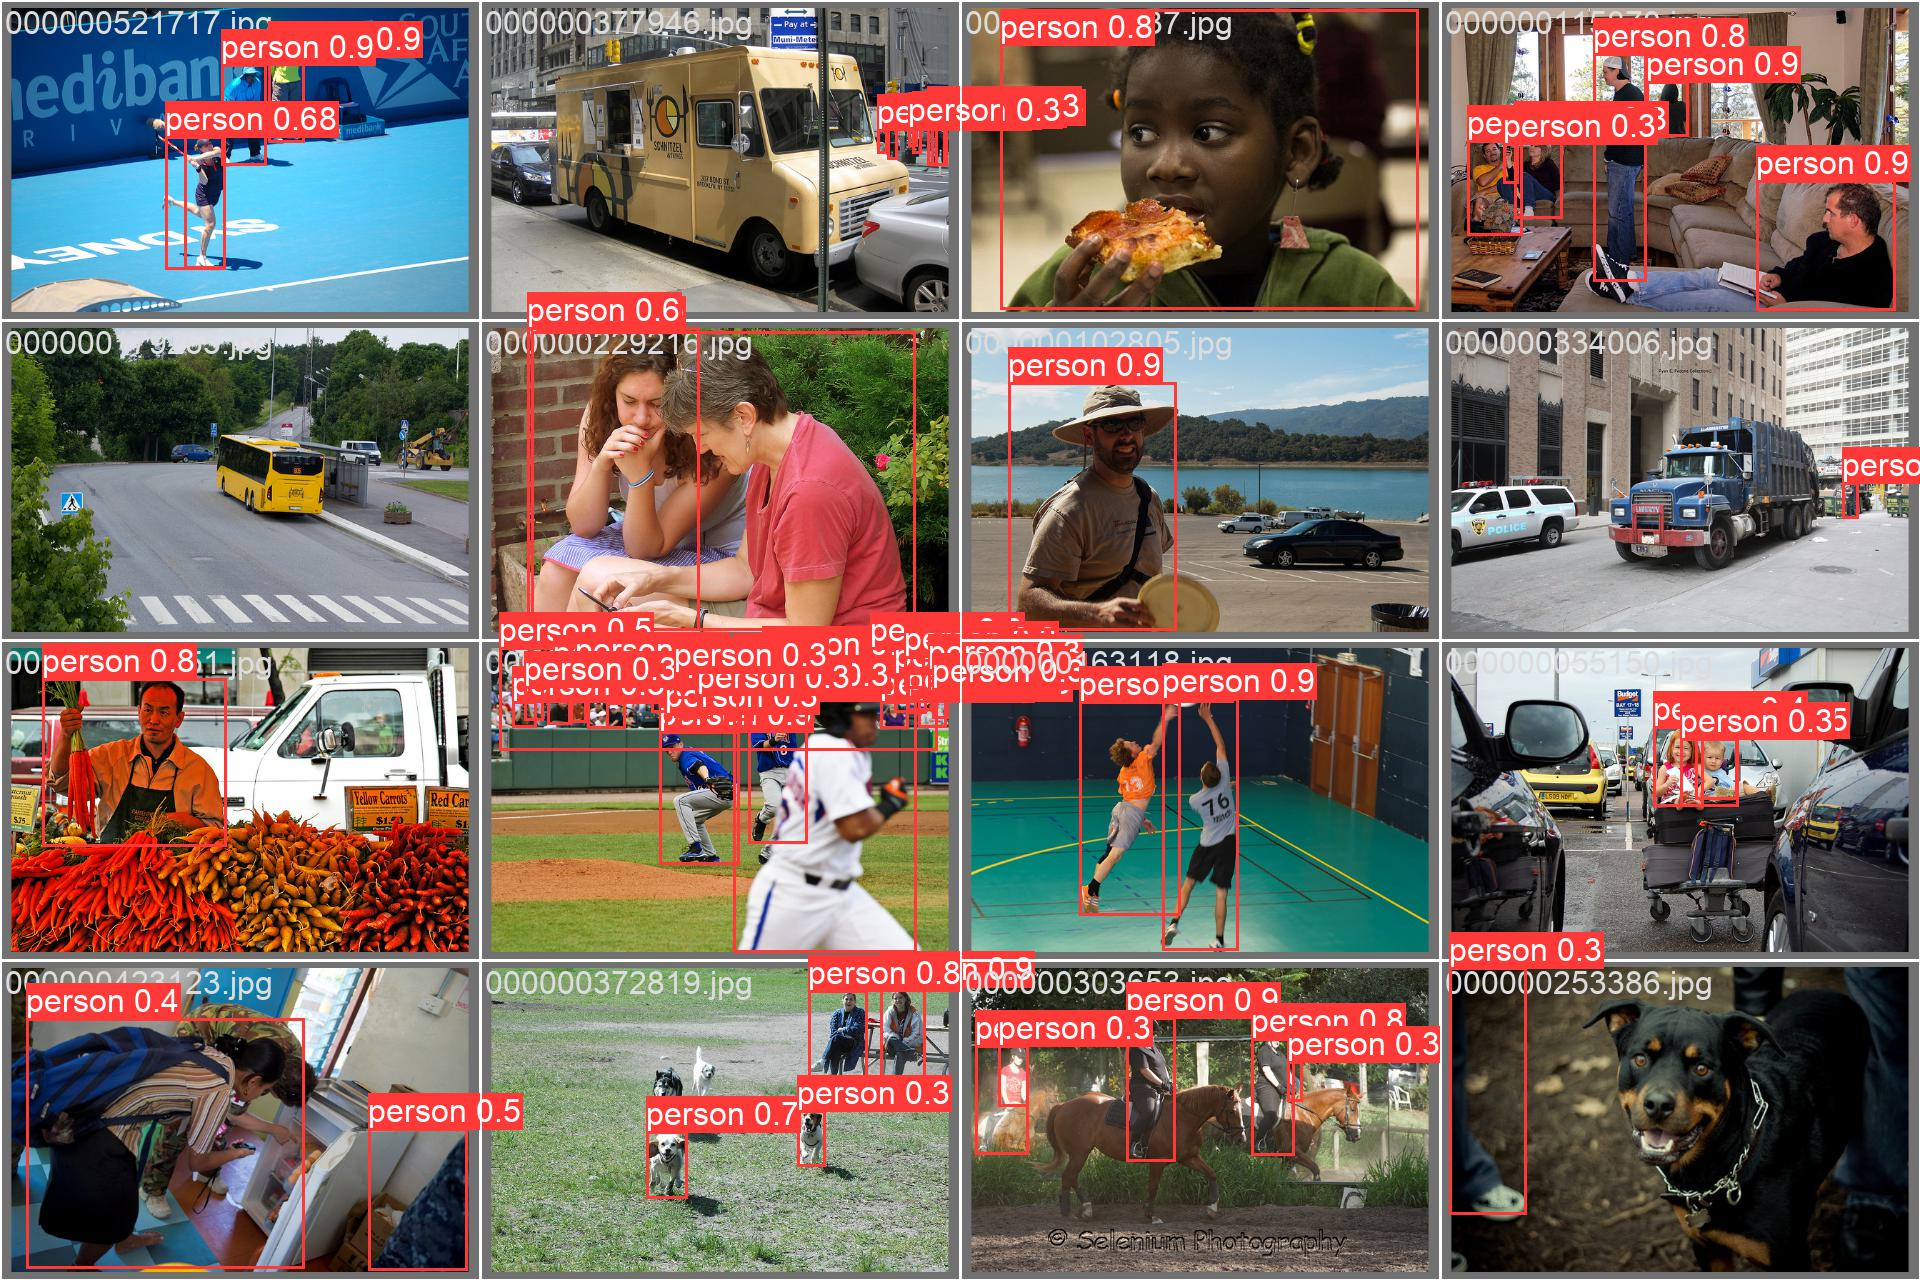

In [9]:
Image(filename=f'runs/detect/train6/val_batch2_pred.jpg', width=600)

#### 4.3 Predict with test dataset
We get avg 30.9ms inference  for 100 image.

In [10]:
model = YOLO("runs/detect/train6/weights/best.pt")

In [11]:
predict_result = model.predict(source='data-yolo/images/test', conf=0.25, save=True)


image 1/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000010707.jpg: 480x640 4 persons, 129.8ms
image 2/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000016451.jpg: 640x640 2 persons, 60.3ms
image 3/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000018837.jpg: 480x640 2 persons, 48.0ms
image 4/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000020333.jpg: 640x448 1 person, 109.6ms
image 5/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000025424.jpg: 640x448 1 person, 39.3ms
image 6/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000028993.jpg: 640x640 4 persons, 53.4ms
image 7/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000030504.jpg: 640x480 1 person, 85.3ms
image 8/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000033759.jpg: 480x640 1 person, 29.3ms
image 9/100 /home/kusumapur/MyPro

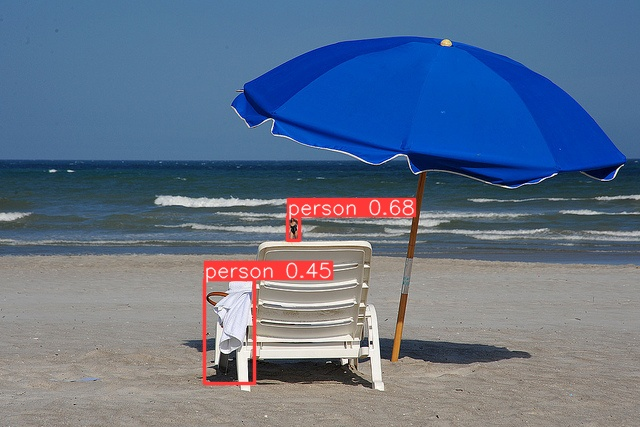

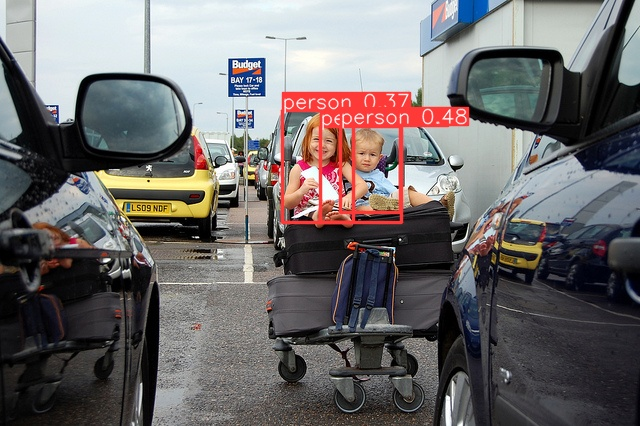

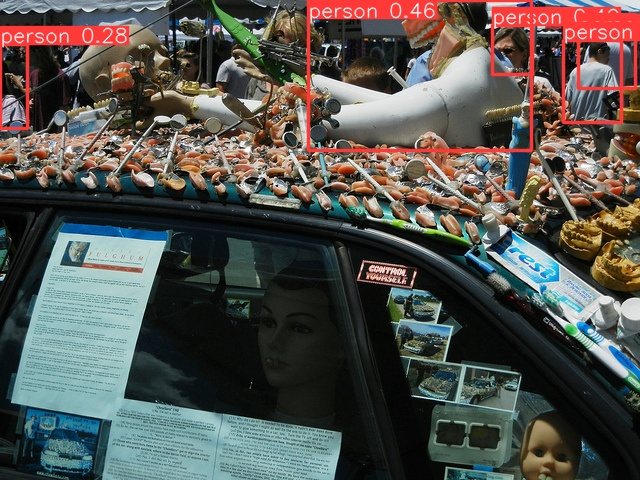

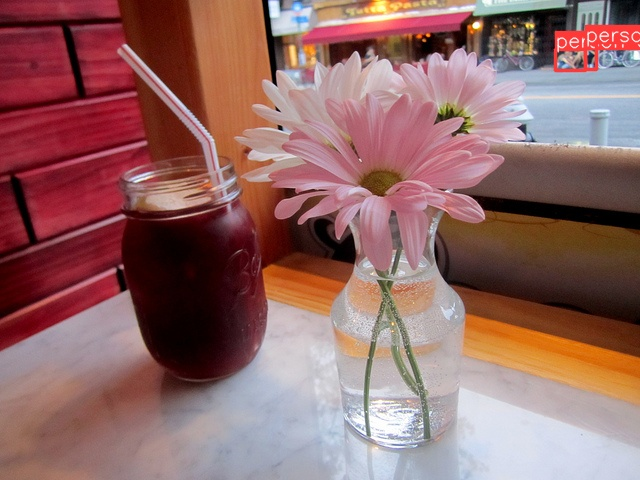

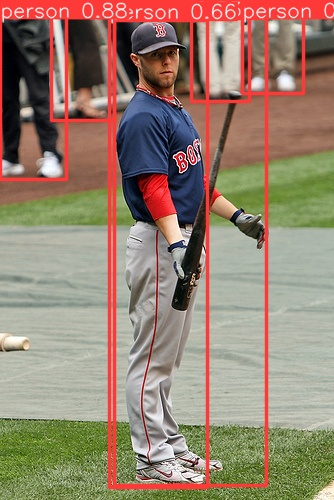

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=300))
      print("\n")

In [1]:
!pwd

/home/kusumapur/MyProject/person_detection


### 5. Continue training from the last saved model with epoch 25. Hence, total epoch are 50

In [2]:
#continue from last
model = YOLO("runs/detect/train6/weights/last.pt")

In [4]:
model.train(data='data-yolo/dataset.yaml', resume=True, epochs=25,imgsz=640, device=0, batch=8 )

New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train6/weights/last.pt, data=data-yolo/dataset.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train62, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/train.cache... 6000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6000/6000 [00:00<?, ?it/s]
val: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/val.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]


Plotting labels to runs/detect/train62/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)


AssertionError: runs/detect/train6/weights/last.pt training to 25 epochs is finished, nothing to resume.
Start a new training without resuming, i.e. 'yolo train model=runs/detect/train6/weights/last.pt'

In [ ]:
model.train(data='data-yolo/dataset.yaml', epochs=25,imgsz=640, device=0, batch=8 )

New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train6/weights/last.pt, data=data-yolo/dataset.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/train.cache... 6000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6000/6000 [00:00<?, ?it/s]
val: Scanning /home/kusumapur/MyProject/person_detection/data-yolo/labels/val.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.65G      1.062     0.9111       1.24         98        640: 100%|██████████| 750/750 [02:46<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.86it/s]


                   all        300       1248       0.73        0.6      0.685      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.84G      1.125      1.003      1.278         38        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]

                   all        300       1248      0.679      0.604      0.668      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.83G       1.17      1.055      1.311         43        640: 100%|██████████| 750/750 [02:37<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.72it/s]

                   all        300       1248      0.717      0.581      0.663      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.83G      1.185      1.069      1.325         49        640: 100%|██████████| 750/750 [02:37<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.37it/s]

                   all        300       1248       0.76      0.567      0.672      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.83G      1.169      1.068       1.32         34        640: 100%|██████████| 750/750 [02:37<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.28it/s]

                   all        300       1248      0.737      0.586      0.677      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.81G      1.166      1.036      1.302         41        640: 100%|██████████| 750/750 [02:42<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]

                   all        300       1248      0.739      0.591      0.686      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.81G      1.147      1.033      1.298         35        640: 100%|██████████| 750/750 [02:41<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.79it/s]

                   all        300       1248      0.754      0.599      0.693      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.83G      1.143      1.005       1.29         76        640: 100%|██████████| 750/750 [02:38<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]

                   all        300       1248      0.768      0.592      0.693      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.83G      1.112     0.9754       1.27         28        640: 100%|██████████| 750/750 [02:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.98it/s]

                   all        300       1248       0.73      0.616      0.711      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.81G      1.104     0.9546      1.265         65        640: 100%|██████████| 750/750 [02:37<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]

                   all        300       1248      0.767       0.58      0.692      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       3.8G      1.096     0.9513       1.26         79        640: 100%|██████████| 750/750 [02:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.82it/s]

                   all        300       1248      0.731       0.62       0.71      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.84G      1.076     0.9218      1.244         54        640: 100%|██████████| 750/750 [02:37<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.93it/s]

                   all        300       1248      0.761      0.615      0.709      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.84G       1.07     0.9099      1.238         47        640: 100%|██████████| 750/750 [02:36<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.76it/s]

                   all        300       1248      0.768      0.606      0.716      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.82G      1.043     0.8901      1.228         81        640: 100%|██████████| 750/750 [02:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.01it/s]

                   all        300       1248      0.766      0.614      0.714      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       3.8G      1.031     0.8678      1.215         68        640: 100%|██████████| 750/750 [02:37<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.88it/s]

                   all        300       1248      0.716      0.657      0.721      0.466


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.84G      1.007       0.81      1.185         13        640: 100%|██████████| 750/750 [02:39<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.87it/s]

                   all        300       1248       0.78      0.611      0.721      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.83G     0.9861     0.7824      1.173         30        640: 100%|██████████| 750/750 [02:37<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.58it/s]

                   all        300       1248      0.792      0.603      0.719      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.81G     0.9708     0.7612      1.161         26        640: 100%|██████████| 750/750 [02:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.57it/s]

                   all        300       1248      0.762      0.635      0.735      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.81G      0.964     0.7351      1.152         23        640: 100%|██████████| 750/750 [02:38<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]

                   all        300       1248      0.789      0.631      0.731      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.84G     0.9534     0.7232      1.147         27        640: 100%|██████████| 750/750 [02:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.96it/s]

                   all        300       1248       0.77       0.64      0.735       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.83G     0.9291      0.699      1.135         18        640: 100%|██████████| 750/750 [02:35<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.02it/s]

                   all        300       1248      0.765      0.643      0.737      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.82G     0.9161     0.6713      1.125         24        640: 100%|██████████| 750/750 [02:36<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.48it/s]

                   all        300       1248      0.772      0.646      0.743      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       3.8G     0.8963     0.6646      1.113         34        640: 100%|██████████| 750/750 [02:35<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.93it/s]

                   all        300       1248      0.777      0.649      0.751      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.84G     0.8873     0.6386       1.11         21        640: 100%|██████████| 750/750 [02:36<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]

                   all        300       1248      0.766      0.661      0.748      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.83G      0.869     0.6261      1.096         38        640: 100%|██████████| 750/750 [02:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.63it/s]

                   all        300       1248      0.802      0.637      0.749      0.499



25 epochs completed in 1.128 hours.


#### 5.1 Loss, mAP50
With additional training, we can get small improvements in loss & mAP50.
mAP50 increase from 0.732 to 0.749 and mAP50-95 from 0.48 to 0.499

In [11]:
from ultralytics.utils.plotting import plot_results
plot_results('runs/detect/train8/results.csv')

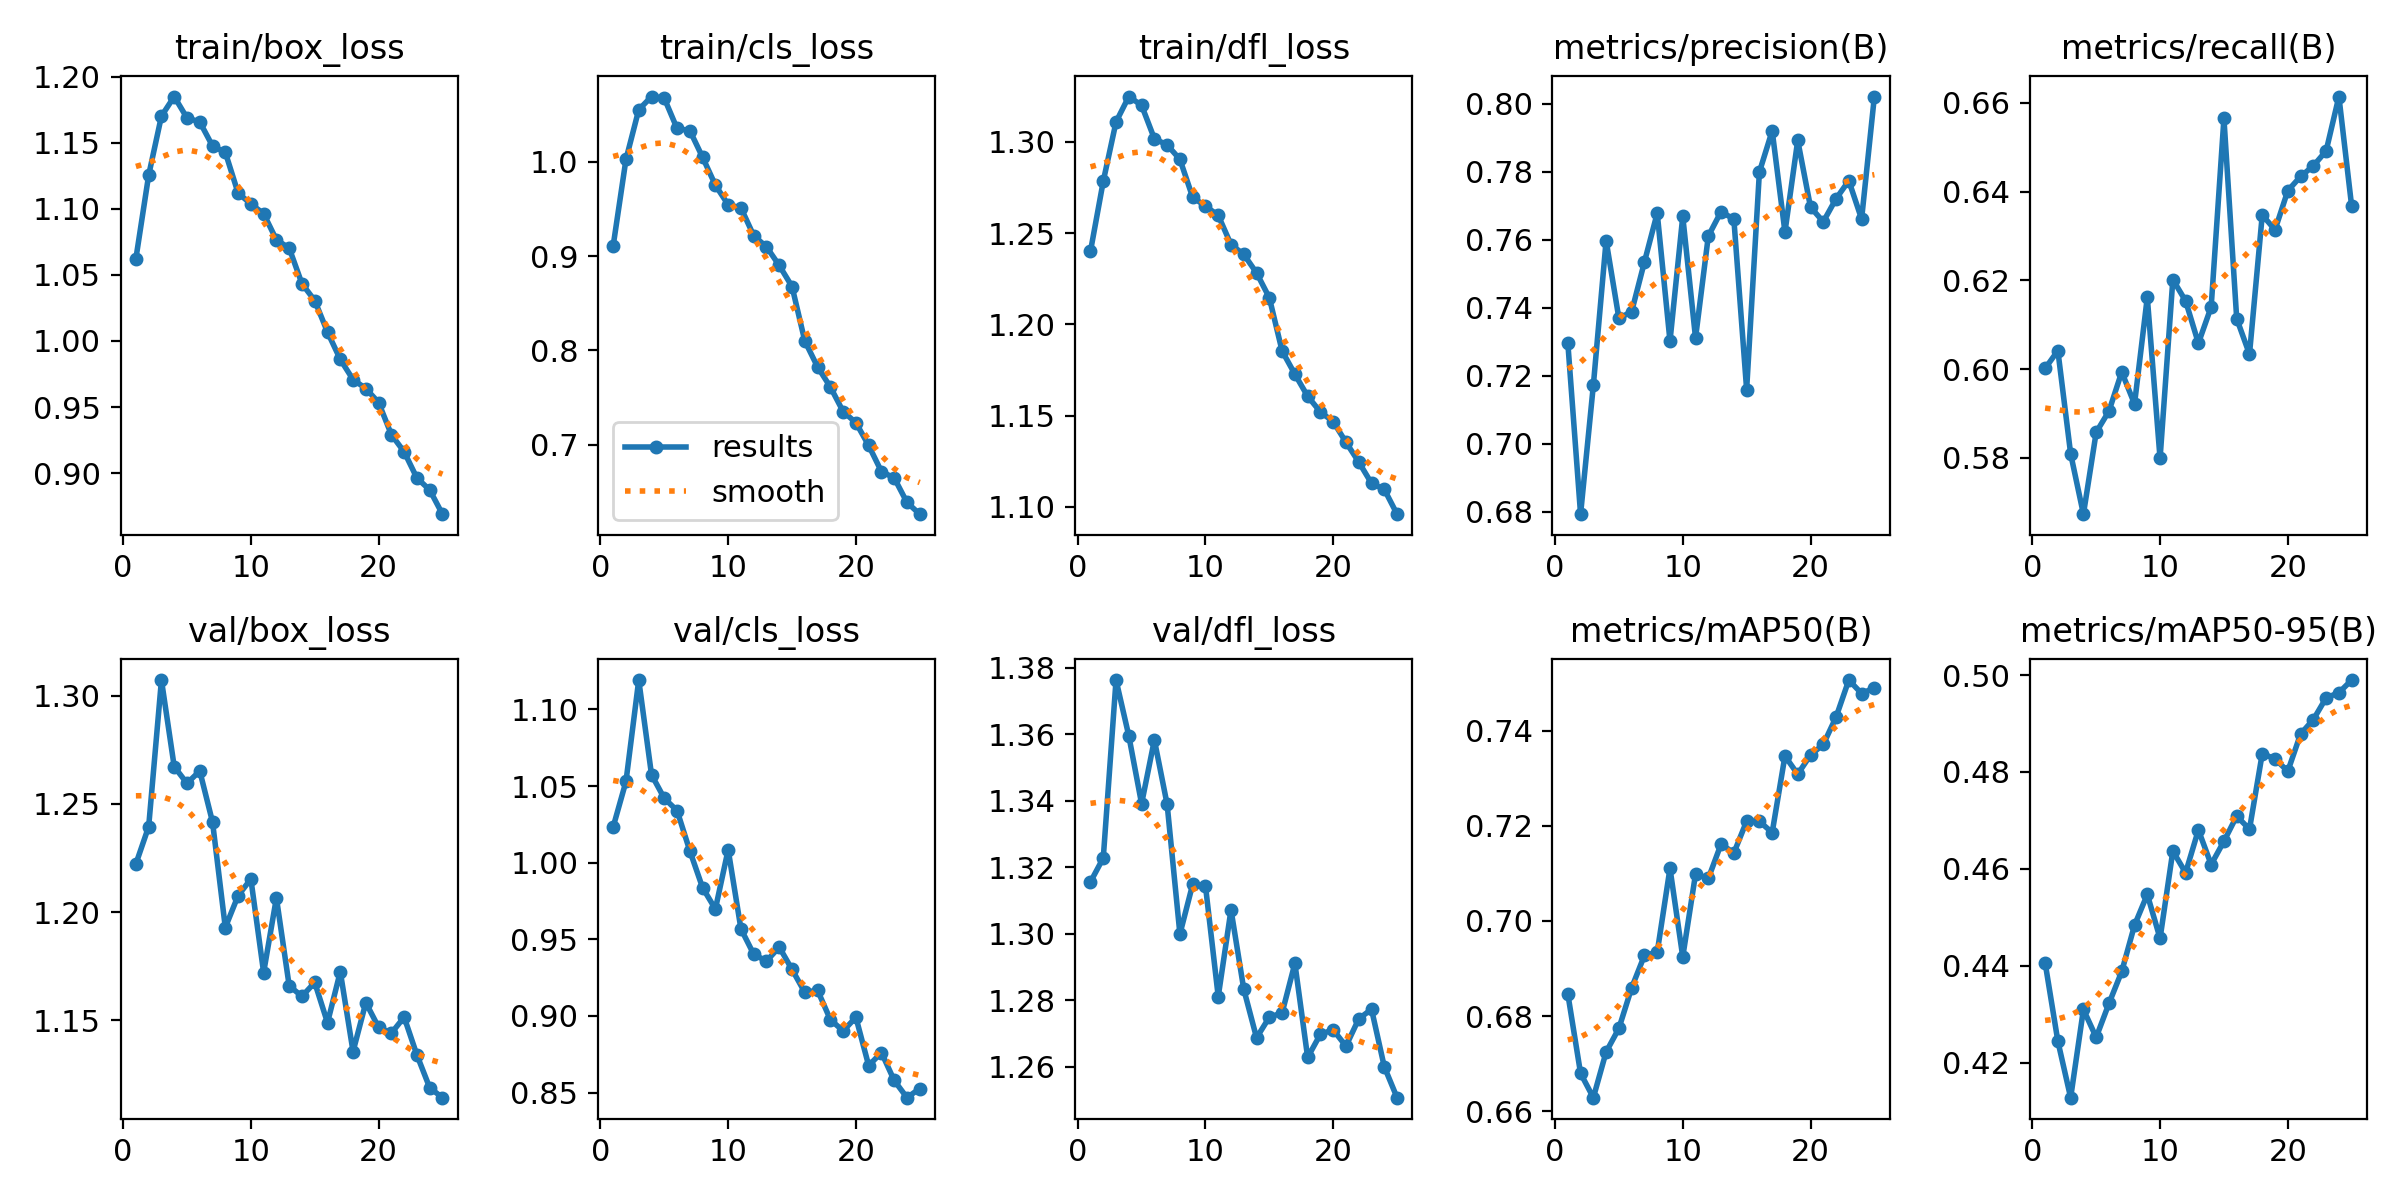

In [12]:
from IPython.display import Image, display
Image(filename='runs/detect/train8/results.png')

In [5]:
!pwd

/home/kusumapur/MyProject/person_detection


In [7]:
model = YOLO("runs/detect/train8/weights/best.pt")

In [8]:
predict_result = model.predict(source='data-yolo/images/test', conf=0.25, save=True)


image 1/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000010707.jpg: 480x640 5 persons, 91.7ms
image 2/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000016451.jpg: 640x640 2 persons, 13.5ms
image 3/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000018837.jpg: 480x640 3 persons, 12.2ms
image 4/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000020333.jpg: 640x448 1 person, 88.8ms
image 5/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000025424.jpg: 640x448 1 person, 10.6ms
image 6/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000028993.jpg: 640x640 4 persons, 13.5ms
image 7/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000030504.jpg: 640x480 1 person, 82.4ms
image 8/100 /home/kusumapur/MyProject/person_detection/data-yolo/images/test/000000033759.jpg: 480x640 1 person, 11.8ms
image 9/100 /home/kusumapur/MyProje

#### 5.2 The prediction result show better conf 

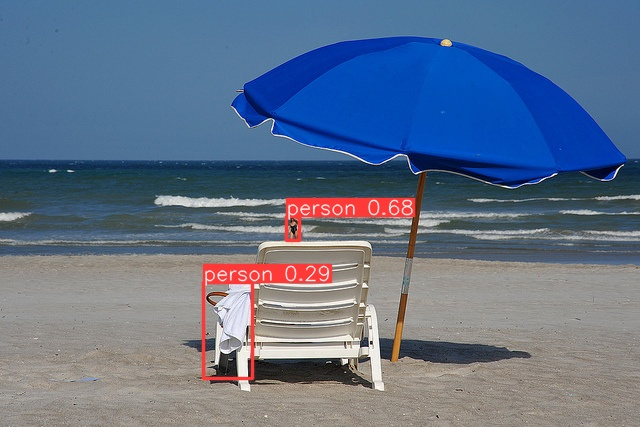

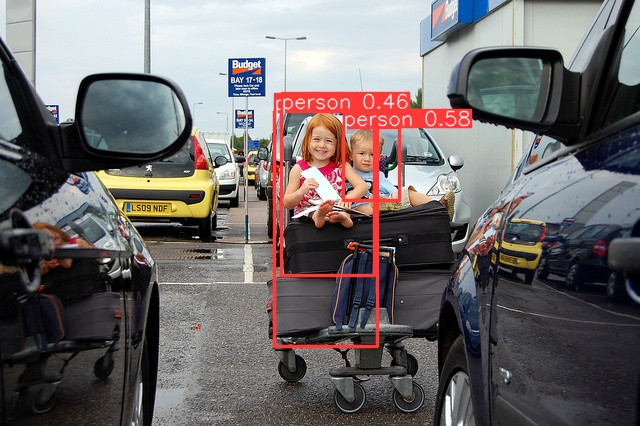

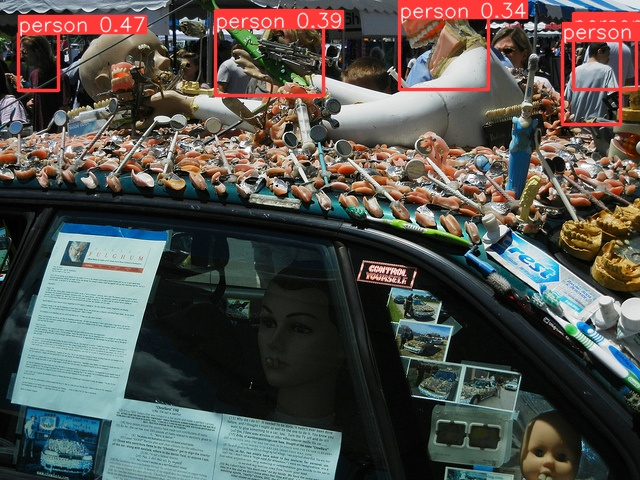

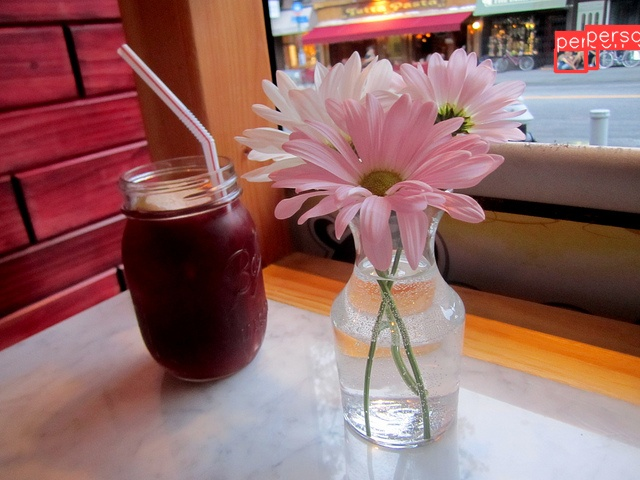

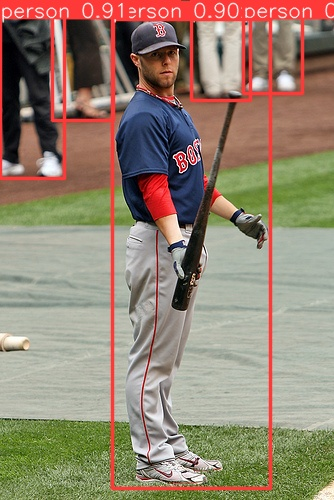

In [9]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict3/*.jpg')[:5]:
      display(Image(filename=image_path, width=300))
      print("\n")

In [2]:
model = YOLO("runs/detect/train8/weights/best.pt")

model.export(format="onnx",opset=12)  # export the model to ONNX format

Ultralytics YOLOv8.1.37 🚀 Python-3.11.7 torch-2.2.2 CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (296.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 1.4 MB/s eta 0:00:0000:0100:01m

requirements: AutoUpdate success ✅ 18.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 12...
ONNX: export success ✅ 19.5s, saved as 'runs/detect/train8/weights/best.onnx' (98.8 MB)

Export complete (21.9s)
Results saved to /home/kusumapur/MyProject/person_detection/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.onnx

'runs/detect/train8/weights/best.onnx'